<h1>Tarea semanal 11</h1>

<h3> Consignas </h3>

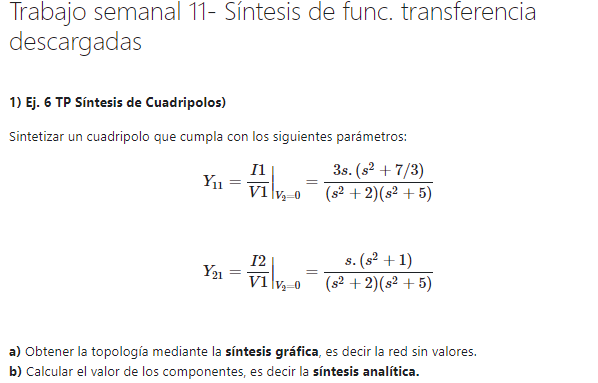

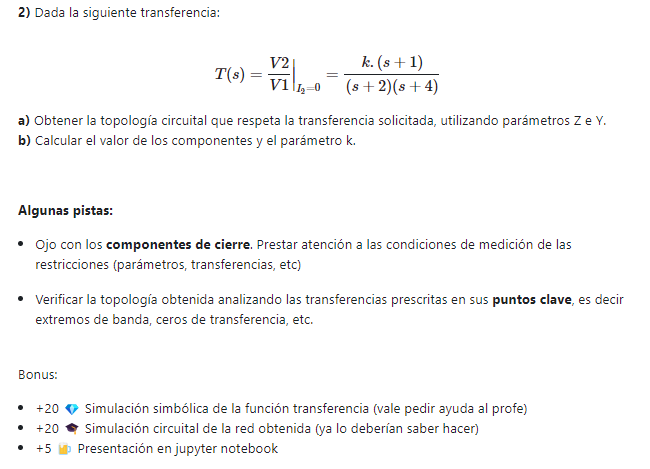

<h3> Resolucion de las consignas</h3>

Se adjunta el desarrollo hecho a mano:

<object data="Desarrollo.pdf" type="application/pdf" width="100%" height="800px">
  <p>El archivo PDF no se puede mostrar. <a href="Desarrollo.pdf">Haz clic aquí para descargarlo.</a></p>
</object>


## Simulaciones

A continuacion se realiza la simulacion del primer ejercicio con LTSPICE y python


In [1]:
import sympy as sp
import numpy as np
from pytc2.remociones import *
from pytc2.dibujar import *

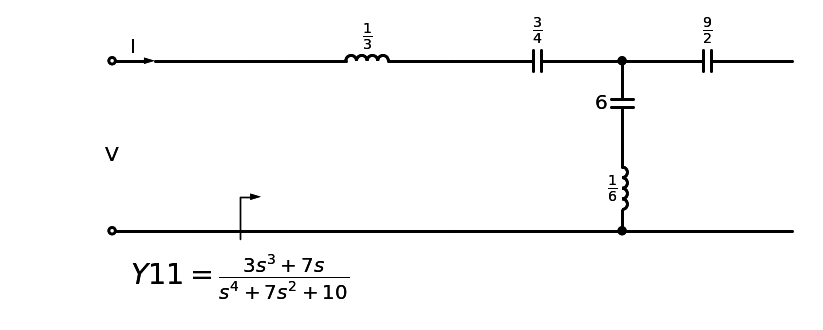

In [2]:

# Resolución simbólica
s = sp.symbols('s ', complex=True)

Y11 = (3*s**3+7*s)/(s**4+7*s**2+10)

Z11 = 1/Y11

# Primer parametro cuadripolo sobrante, segundo parametro elemento removido
ZA, ZL1 = remover_polo_infinito(Z11)
L1 = ZL1 / s

# Remuevo parte del polo en jw = 0    
ZB, ZC1 = remover_polo_dc(ZA, omega_zero = 1)
C1 = 1/(ZC1*s)

# Paso a admitancia
YB = 1 / ZB

#Remuevo LC en derivacion
YC, Ytanque, L2, C2 = remover_polo_jw(YB, 1, isImpedance=False)

ZC = 1/YC

ZD, ZC3 = remover_polo_dc(ZC)

C3= 1/(ZC3 * s)
# Dibujo red:
circuito = Drawing(unit=4)
circuito = dibujar_puerto_entrada(circuito, voltage_lbl = ('V'), current_lbl = 'I')
circuito, zz_lbl = dibujar_funcion_exc_abajo(circuito, 'Y11', Y11, hacia_salida = True,k_gap_width = 0.5)
circuito = dibujar_elemento_serie(circuito, Inductor, L1)
circuito = dibujar_elemento_serie(circuito, Capacitor, C1)
circuito = dibujar_tanque_derivacion(circuito, L2, C2)
circuito = dibujar_elemento_serie(circuito, Capacitor, C3)
display(circuito)

## Simulacion con LTSPICE

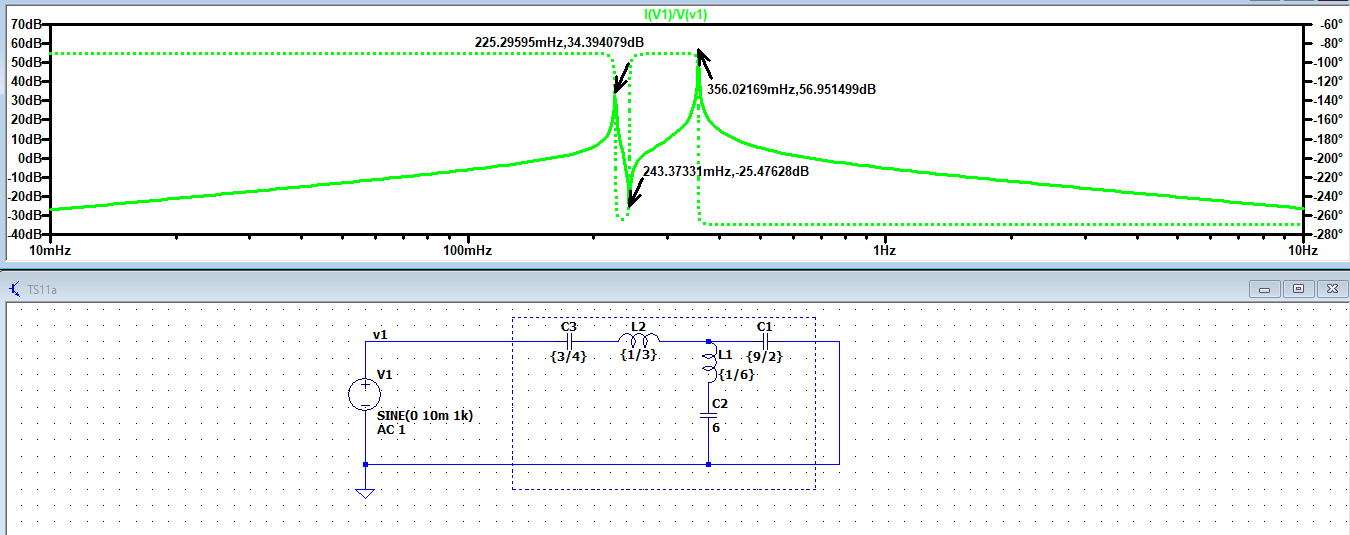

En la imagen se pueden observar los polos y ceros de la transferencia para Y11.

* En W=0: cero
* En w=2 (F=224.639 mHz) polo
* En w=7/3 (F=243.298 mHz) cero
* En w=5 (F=354.409 mHz) polo
* En W=infinito cero

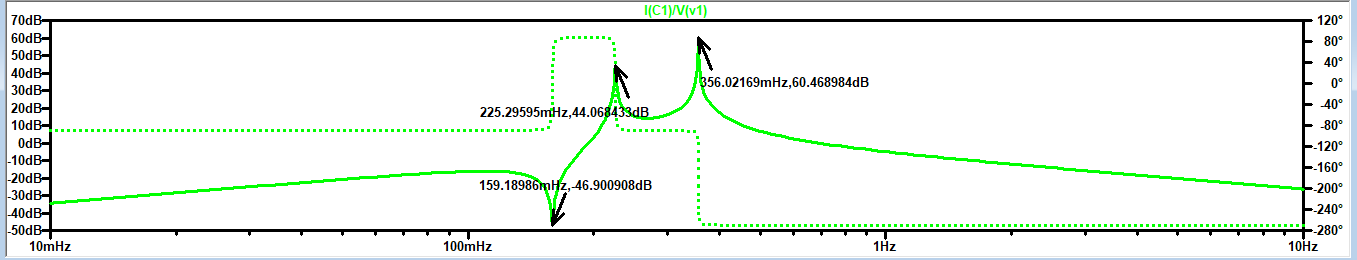

En la imagen se pueden observar los polos y ceros de la transferencia para Y21.

* En W=0: cero
* En w=2 (F=224.639 mHz) polo
* En w=7/3 (F=243.298 mHz) cero
* En w=5 (F=354.409 mHz) polo
* En W=infinito cero

### Simulacion segundo ejercicio con impedancias

A continuacion se hace la simulacion de la remocion para el ejercicio 2 resuelto por el metodo de impedancia

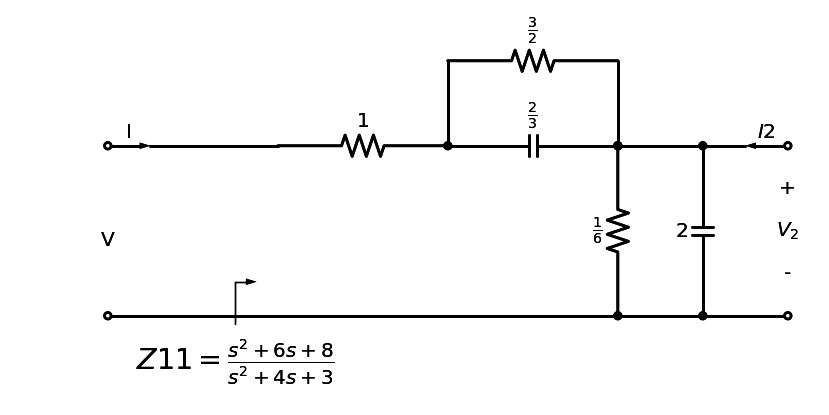

In [3]:

# Resolución simbólica
s = sp.symbols('s ', complex=True)

Z11 = (s**2 + 6*s + 8)/(s**2+4*s+3)

ZA, R1 = remover_valor_en_infinito(Z11)

ZB, ZRC, R2, C1 = remover_polo_sigma(ZA, 1, isImpedance=True)

YB = 1 / ZB

ZC2, G3 = remover_valor_en_dc(YB)

C2 = ZC2 / s

# Dibujo red:
circuito = Drawing(unit=4)
circuito = dibujar_puerto_entrada(circuito, voltage_lbl = ('V'), current_lbl = 'I')
circuito, zz_lbl = dibujar_funcion_exc_abajo(circuito, 'Z11', Z11, hacia_salida = True,k_gap_width = 0.5)

circuito = dibujar_elemento_serie(circuito, Resistor, R1)
circuito = dibujar_tanque_RC_serie(circuito, R2, C1)
circuito = dibujar_elemento_derivacion(circuito, Resistor, 1/G3)
circuito = dibujar_espacio_derivacion(circuito)
circuito = dibujar_elemento_derivacion(circuito, Capacitor, C2)
circuito = dibujar_puerto_salida(circuito,
                        voltage_lbl = ('+', '$V_2$', '-'), 
                        current_lbl = '$I2$')

display(circuito)

### Simulacion segundo ejercicio con admitancias

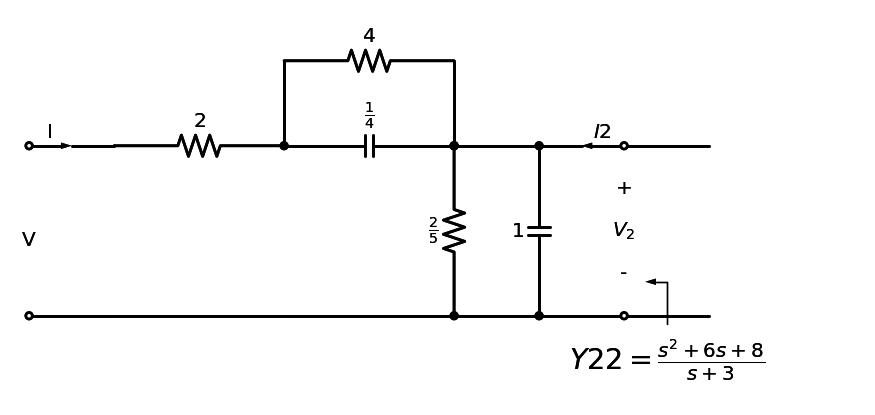

In [4]:

# Resolución simbólica
s = sp.symbols('s ', complex=True)

Y22 = (s**2 + 6*s + 8)/(s+3)

YA, ZC1 = remover_polo_infinito(Y22)

C1 = ZC1 / s

YB, G1 = remover_valor(YA, 1)

ZB = 1 / YB

R3, ZRC, R2, C2 = remover_polo_sigma(ZB, 1, isImpedance=True)


# Dibujo red:
circuito = Drawing(unit=4)
circuito = dibujar_puerto_entrada(circuito, voltage_lbl = ('V'), current_lbl = 'I')
circuito = dibujar_elemento_serie(circuito, Resistor, R3)
circuito = dibujar_tanque_RC_serie(circuito, R2, C2)
circuito = dibujar_elemento_derivacion(circuito, Resistor, 1/G1)
circuito = dibujar_espacio_derivacion(circuito)
circuito = dibujar_elemento_derivacion(circuito, Capacitor, C1)
circuito = dibujar_puerto_salida(circuito,
                        voltage_lbl = ('+', '$V_2$', '-'), 
                        current_lbl = '$I2$')
circuito, zz_lbl = dibujar_funcion_exc_abajo(circuito, 'Y22', Y22, hacia_entrada = True,k_gap_width = 0.5)

display(circuito)